<a href="https://colab.research.google.com/github/rahafbader/T5/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [79]:

df=pd.read_csv("/content/RTA_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [80]:
print(df.isnull().sum)
print(df.duplicated().sum())
print(df.head())

<bound method DataFrame.sum of         Time  Day_of_week  Age_band_of_driver  Sex_of_driver  \
0      False        False               False          False   
1      False        False               False          False   
2      False        False               False          False   
3      False        False               False          False   
4      False        False               False          False   
...      ...          ...                 ...            ...   
12311  False        False               False          False   
12312  False        False               False          False   
12313  False        False               False          False   
12314  False        False               False          False   
12315  False        False               False          False   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
0                  False                    False               False   
1                  False                    False     

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [81]:
df['Educational_level'].fillna(df['Educational_level'].mode()[0],inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0],inplace=True)
df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0],inplace=True)
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0],inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0],inplace=True)
df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0],inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0],inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0],inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0],inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0],inplace=True)
df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0],inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0],inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0],inplace=True)


df=df.drop('Service_year_of_vehicle',axis=1)
df=df.drop('Defect_of_vehicle',axis=1)
df=df.drop('Work_of_casuality',axis=1)
df=df.drop('Fitness_of_casuality',axis=1)
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

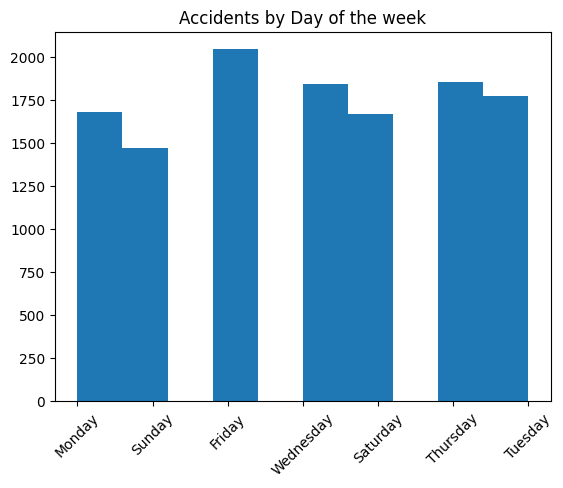

In [82]:
plt.hist(x='Day_of_week', data=df)
plt.title('Accidents by Day of the week')
plt.xticks(rotation=45)
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


target_column = 'Accident_severity'
X = df.drop(columns=[target_column])
y = df[target_column]
label_encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver="lbfgs", random_state=42)
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
y_pred_prob = log_model.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)
y_pred_prob_tree = tree_model.predict_proba(x_test)[:, 1]

#### Support Vector Machine (SVM)

In [86]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)
y_pred_prob_svm = svm_model.predict_proba(x_test)[:, 1]


#### K-Neighbors Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)
y_pred_prob_knn = knn_model.predict_proba(x_test)[:, 1]


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

accuracy_log = accuracy_score(y_test, y_pred)
precision_log = precision_score(y_test, y_pred, average='weighted')
recall_log = recall_score(y_test, y_pred, average='weighted')
f1_log = f1_score(y_test, y_pred, average='weighted')
conf_matrix_log = confusion_matrix(y_test, y_pred)
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob, pos_label=log_model.classes_[1])
roc_auc_log = auc(fpr_log, tpr_log)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_log}")
print(f"Precision: {precision_log}")
print(f"Recall: {recall_log}")
print(f"F1 Score: {f1_log}")
print("Confusion Matrix:")
print(conf_matrix_log)

#-------------------------------------

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_prob_tree, pos_label=tree_model.classes_[1])
roc_auc_tree = auc(fpr_tree, tpr_tree)
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_tree}")
print(f"Precision: {precision_tree}")
print(f"Recall: {recall_tree}")
print(f"F1 Score: {f1_tree}")
print("Confusion Matrix:")
print(conf_matrix_tree)

#-------------------------
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm, pos_label=svm_model.classes_[1])
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)

#------------------------------------------------
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn, pos_label=knn_model.classes_[1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

print("K-Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829
F1 Score: 0.7620784972005167
Confusion Matrix:
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
Decision Tree Classifier:
Accuracy: 0.7604871447902571
Precision: 0.7641437605813375
Recall: 0.7604871447902571
F1 Score: 0.7622786543180372
Confusion Matrix:
[[  14    6   32]
 [  15  148  389]
 [  32  411 2648]]
Support Vector Machine (SVM):
Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829
F1 Score: 0.7620784972005167
Confusion Matrix:
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
K-Neighbors Classifier:
Accuracy: 0.8073071718538566
Precision: 0.7508057222437349
Recall: 0.8073071718538566
F1 Score: 0.770332935851636
Confusion Matrix:
[[   3    3   46]
 [   0   60  492]
 [   5  166 2920]]


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:


Comparative Analysis
Compare Metrics:

Logistic Regression & SVM: High accuracy (0.8365) but low precision due to no predicted samples for some labels.
Decision Tree: Lower accuracy (0.7532) but balanced precision (0.7609).
K-Neighbors: Moderate accuracy (0.8027) and good F1 score (0.7641).

Evaluate Trade-offs:

Logistic Regression & SVM: Simple, efficient, but precision issues.
Decision Tree: Easy to interpret, lower accuracy.
K-Neighbors: Moderate efficiency, resource-intensive for large data.

Justify Your Choice:

Logistic Regression/SVM: Chosen for high accuracy and ease of use, despite precision issues.


Logistic Regression/SVM: Low precision for some labels.
Decision Tree: Overfitting risk.
Future Improvements:

Hyperparameter tuning and ensemble methods.
Feature engineering to enhance model performance.